**Script conversion into python**


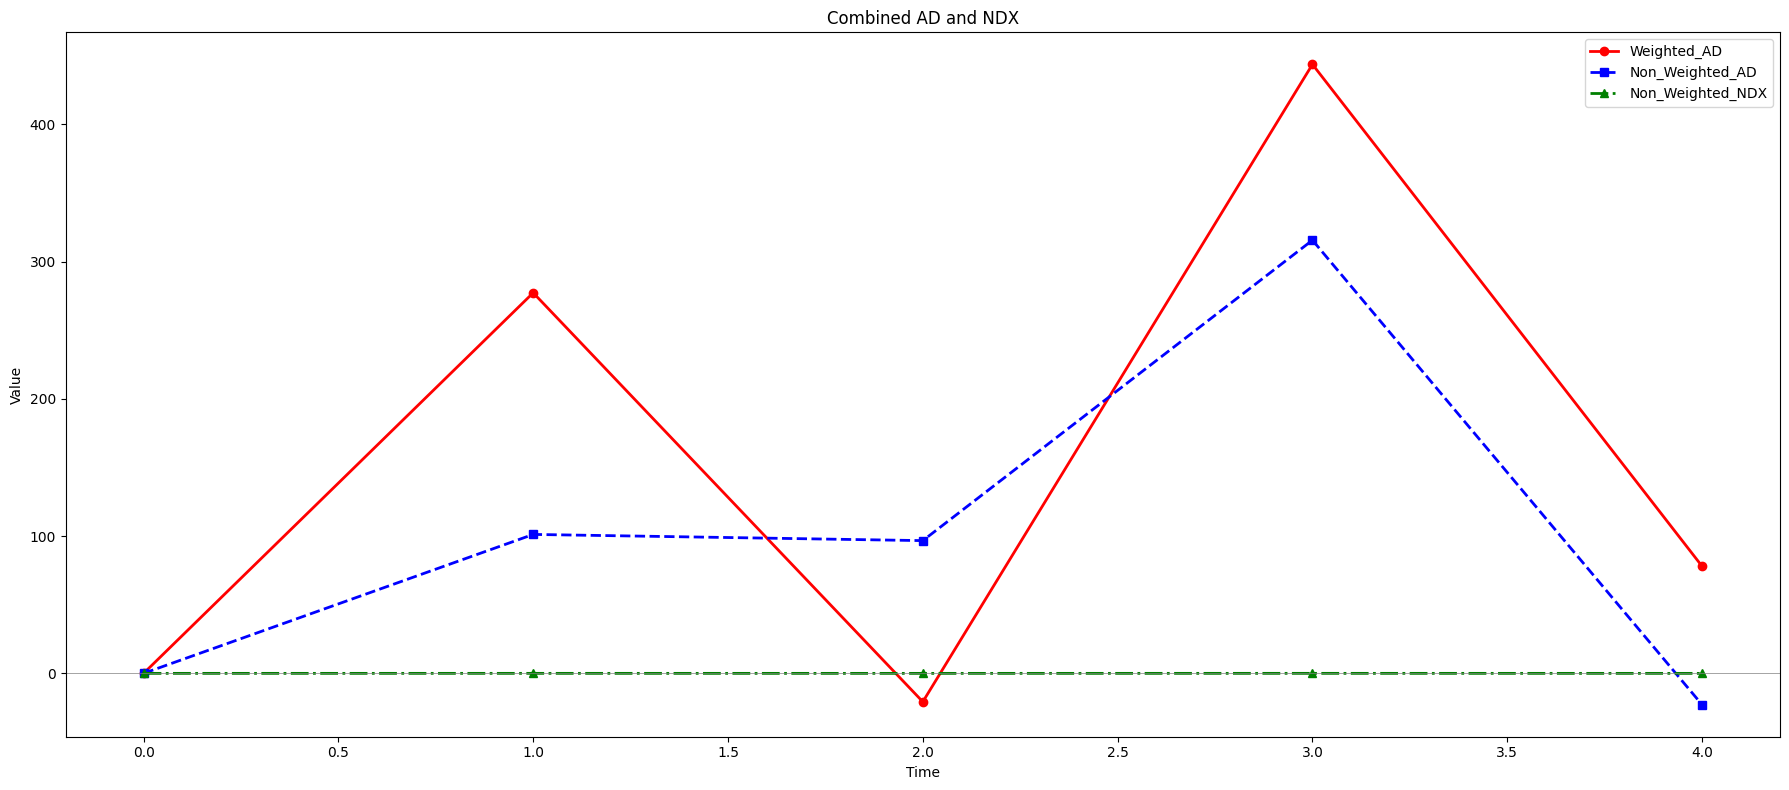

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inputs
open_time = 930

xlpwt = 6.05  # ConsumerStaples
xluwt = 2.27  # Utilities
xlcwt = 9.31  # Communications
xlfwt = 11.33  # Financials
xlbwt = 2.34  # Materials
xliwt = 8.68  # Industrials
xlewt = 4.11  # Energy
xlrewt = 2.15  # RealEstate
xlvwt = 12.06  # HealthCare
xlkwt = 29.77  # InformationTechnology
xlywt = 10.22  # ConsumerDiscretionary

SectorCount = 11
Scale = 5000

# Sample data
data = {
    'XLK': [100, 102, 101, 103, 104],   # Information Technology (XLK) historical prices
    'XLY': [200, 198, 201, 202, 200],   # Consumer Discretionary (XLY) historical prices
    'XLV': [150, 152, 151, 153, 154],   # Health Care (XLV) historical prices
    'XLF': [250, 248, 251, 252, 250],   # Financials (XLF) historical prices
    'XLC': [300, 302, 301, 303, 304],   # Communications (XLC) historical prices
    'XLI': [400, 398, 401, 402, 400],   # Industrials (XLI) historical prices
    'XLP': [500, 502, 501, 503, 504],   # Consumer Staples (XLP) historical prices
    'XLRE': [600, 598, 601, 602, 600],  # Real Estate (XLRE) historical prices
    'XLE': [700, 702, 701, 703, 704],   # Energy (XLE) historical prices
    'XLB': [800, 798, 801, 802, 800],   # Materials (XLB) historical prices
    'XLU': [900, 902, 901, 903, 904],   # Utilities (XLU) historical prices
    'NDX': [1200, 1210, 1205, 1220, 1215]  # Nasdaq 100 Index (NDX) historical prices
}

## Values for each sector in "data" variable is taken on the basis of assumption of historical price at differnt days,
## these values can be replace by real time data.
## In the above, data represents the historical prices at different points in time (e.g., day 1, day 2, etc.).

df = pd.DataFrame(data)

# Calculate percent change
def calculate_percent_change(symbol):
    return df[symbol].pct_change().fillna(0)

# Calculate weighted and non-weighted AD
xlkPctChg = calculate_percent_change('XLK')
xlyPctChg = calculate_percent_change('XLY')
xlvPctChg = calculate_percent_change('XLV')
xlfPctChg = calculate_percent_change('XLF')
xlcPctChg = calculate_percent_change('XLC')
xliPctChg = calculate_percent_change('XLI')
xlpPctChg = calculate_percent_change('XLP')
xlrePctChg = calculate_percent_change('XLRE')
xlePctChg = calculate_percent_change('XLE')
xlbPctChg = calculate_percent_change('XLB')
xluPctChg = calculate_percent_change('XLU')
ndxPctChg = calculate_percent_change('NDX')

# Calculate sizing:
xlkSizing = xlkPctChg * xlkwt
xlvSizing = xlvPctChg * xlvwt
xlySizing = xlyPctChg * xlywt
xlfSizing = xlfPctChg * xlfwt
xlcSizing = xlcPctChg * xlcwt
xliSizing = xliPctChg * xliwt
xlpSizing = xlpPctChg * xlpwt
xleSizing = xlePctChg * xlewt
xlreSizing = xlrePctChg * xlrewt
xlbSizing = xlbPctChg * xlbwt
xluSizing = xluPctChg * xluwt

## Calculate combined sizing:
combinedSizing = Scale * (
    xlkSizing +
    xlvSizing +
    xlySizing +
    xlfSizing +
    xlcSizing +
    xliSizing +
    xlpSizing +
    xleSizing +
    xlreSizing +
    xlbSizing +
    xluSizing
) / SectorCount

spxcombinedSizing = Scale * (
    xlkPctChg +
    xlvPctChg +
    xlyPctChg +
    xlfPctChg +
    xlcPctChg +
    xliPctChg +
    xlpPctChg +
    xlePctChg +
    xlrePctChg +
    xlbPctChg +
    xluPctChg
)

# Plotting
plt.figure(figsize=(18, 8))

# Combined plot of Weighted_AD, Non_Weighted_AD, and Non_Weighted_NDX
plt.plot(df.index, combinedSizing, color='red', marker='o', linestyle='-', linewidth=2, label='Weighted_AD')
plt.plot(df.index, spxcombinedSizing, color='blue', marker='s', linestyle='--', linewidth=2, label='Non_Weighted_AD')
plt.plot(df.index, ndxPctChg, color='green', marker='^', linestyle='-.', linewidth=2, label='Non_Weighted_NDX')

plt.axhline(0, color='gray', linewidth=0.5)
plt.title('Combined AD and NDX')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()




*   In the above code work on the assumption of "Data" dictionary where values are taken on random basis, just to trace the comparisonof  how the combined weighted adjustments (Weighted_AD) differ from non-weighted adjustments (Non_Weighted_AD) across various sectors over time.
*   **Weighted_AD**: Shows the aggregated weighted adjustments of sector ETFs over time.

*   **Non_Weighted_AD**: Represents the non-weighted aggregate adjustments of sector ETFs
*   **Non_Weighted_NDX**: Displays the percentage change of the Nasdaq 100 Index (NDX) over the same period.





The above graph givs the rough idea about the changes between AD and NDX.

[*********************100%%**********************]  11 of 11 completed


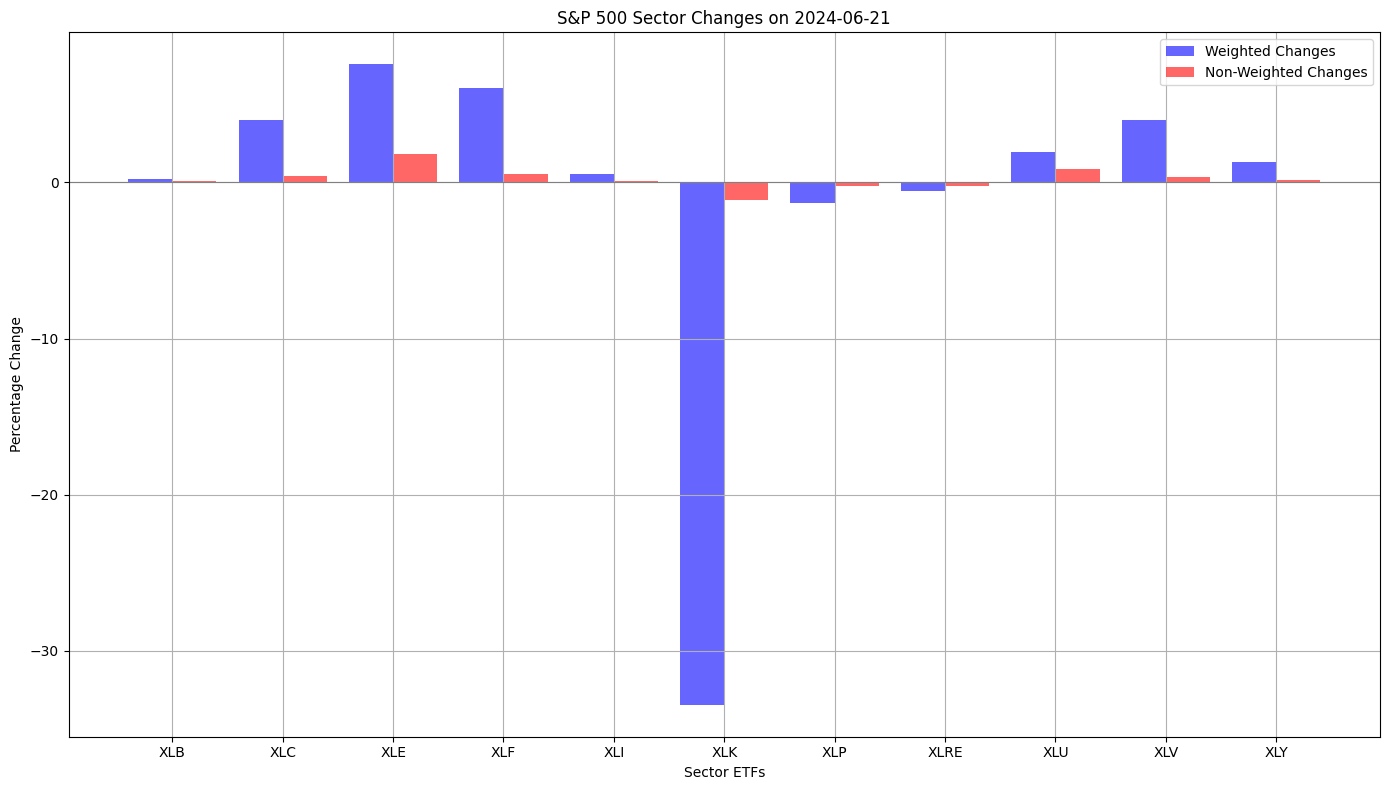

Non-Weighted Sum: 2.6870618477287334
Weighted Sum: -493.8847973587969


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the sector ETFs and their weights
etf_weights = {
    'XLK': 29.77,  # Information Technology
    'XLY': 10.22,  # Consumer Discretionary
    'XLV': 12.06,  # Health Care
    'XLF': 11.33,  # Financials
    'XLC': 9.31,   # Communications
    'XLI': 8.68,   # Industrials
    'XLP': 6.05,   # Consumer Staples
    'XLE': 4.11,   # Energy
    'XLRE': 2.15,  # Real Estate
    'XLB': 2.34,   # Materials
    'XLU': 2.27    # Utilities
}

# Fetch historical data
end_date = datetime.now()
start_date = end_date - timedelta(days=7)  # Fetch data for the last 7 days for better coverage

data = yf.download(list(etf_weights.keys()), start=start_date, end=end_date, interval='1d')

# Calculate percentage changes
pct_changes = data['Close'].pct_change().fillna(0) * 100

# Get today's percentage changes
today_pct_changes = pct_changes.iloc[-1]

# Apply weights and calculate the weighted and non-weighted sums
weighted_changes = today_pct_changes * pd.Series(etf_weights)
non_weighted_sum = today_pct_changes.sum()
weighted_sum = weighted_changes.sum() / sum(etf_weights.values()) * 5000

# Plot the combined results
plt.figure(figsize=(14, 8))

# Plot weighted changes
bar_width = 0.4
positions = range(len(today_pct_changes))
plt.bar(positions, weighted_changes, color='blue', alpha=0.6, width=bar_width, label='Weighted Changes')

# Plot non-weighted changes with some offset to avoid overlap
plt.bar([p + bar_width for p in positions], today_pct_changes, color='red', alpha=0.6, width=bar_width, label='Non-Weighted Changes')

# Add a horizontal line at y=0 for reference
plt.axhline(0, color='gray', linewidth=0.8)

# Add titles and labels
plt.title(f"S&P 500 Sector Changes on {end_date.strftime('%Y-%m-%d')}")
plt.xlabel('Sector ETFs')
plt.ylabel('Percentage Change')
plt.xticks([p + bar_width / 2 for p in positions], weighted_changes.index)

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

print(f"Non-Weighted Sum: {non_weighted_sum}")
print(f"Weighted Sum: {weighted_sum}")





*    The above plot shows the weighted and non-weighted sum of today's percentage changes.
*   The code fetches data for the past 7 days, but it specifically calculates and plots the percentage changes for only the most recent day (today).


*   It plots these results, showing both the weighted and non-weighted sector
changes.


*   The above bar chart showing today's weighted and non-weighted percentage changes for  S&P 500 sector ETFs without including the NDX.








[*********************100%%**********************]  12 of 12 completed


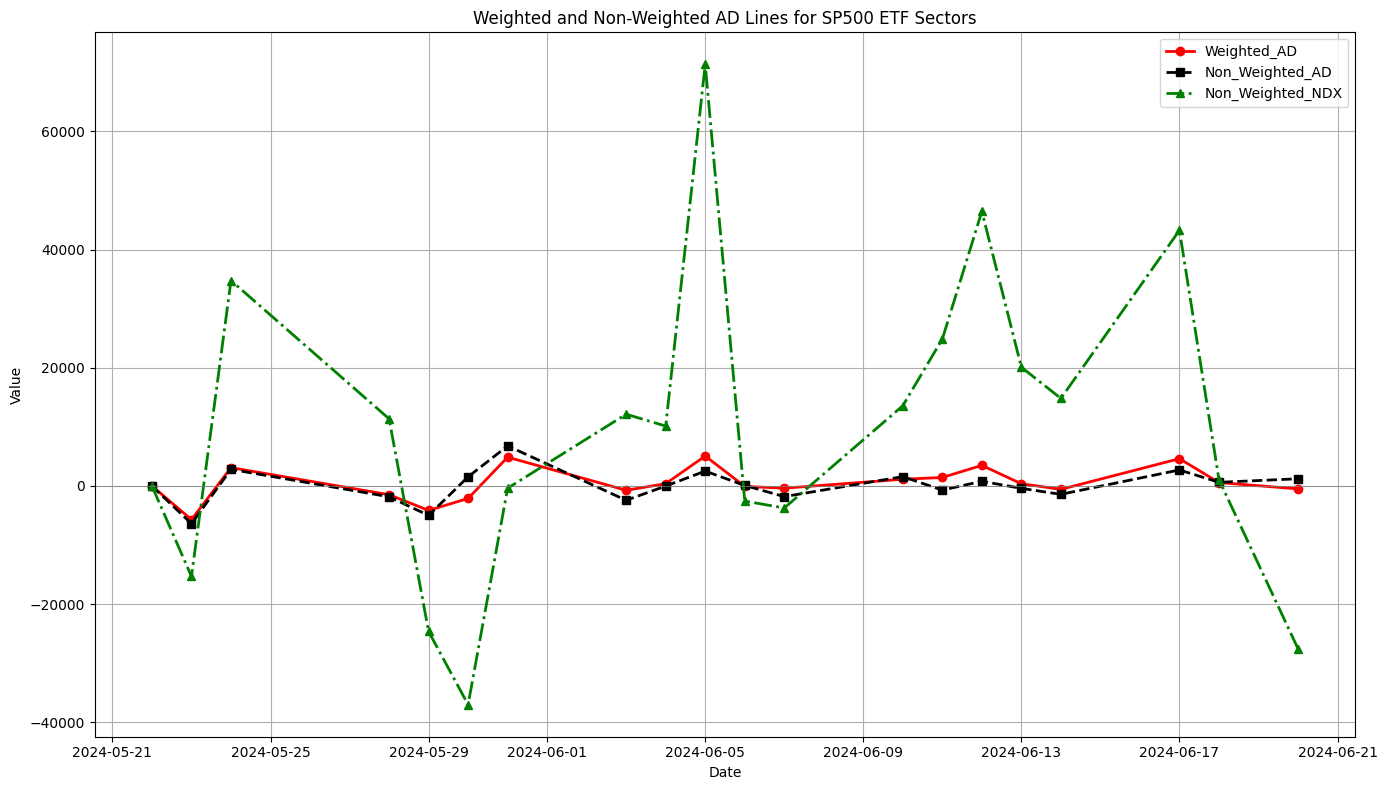

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the sector ETFs and their weights
etf_weights = {
    'XLK': 29.77,  # Information Technology
    'XLY': 10.22,  # Consumer Discretionary
    'XLV': 12.06,  # Health Care
    'XLF': 11.33,  # Financials
    'XLC': 9.31,   # Communications
    'XLI': 8.68,   # Industrials
    'XLP': 6.05,   # Consumer Staples
    'XLE': 4.11,   # Energy
    'XLRE': 2.15,  # Real Estate
    'XLB': 2.34,   # Materials
    'XLU': 2.27    # Utilities
}

# Add NDX to the list of tickers
tickers = list(etf_weights.keys()) + ['^NDX']

# Fetch historical data
end_date = datetime.now()
start_date = end_date - timedelta(days=30)  # Fetch data for the last 30 days for better coverage

data = yf.download(tickers, start=start_date, end=end_date, interval='1d')

# Calculate percentage changes
pct_changes = data['Close'].pct_change().fillna(0) * 100

# Separate the NDX percentage change
ndx_pct_change = pct_changes['^NDX']
pct_changes = pct_changes.drop(columns=['^NDX'])

# Apply weights and calculate the weighted and non-weighted sums
weighted_changes = pct_changes * pd.Series(etf_weights)
non_weighted_sum = pct_changes.sum(axis=1)
weighted_sum = weighted_changes.sum(axis=1) / sum(etf_weights.values()) * 5000

# Scale the NDX percentage change
ndx_scaled_change = ndx_pct_change * 35000

# Plotting
plt.figure(figsize=(14, 8))

# Plot weighted AD line
plt.plot(weighted_sum, color='red', marker='o', linestyle='-', linewidth=2, label='Weighted_AD')

# Plot non-weighted AD line
plt.plot(non_weighted_sum * 5000 / len(etf_weights), color='black', marker='s', linestyle='--', linewidth=2, label='Non_Weighted_AD')

# Plot NDX AD line
plt.plot(ndx_scaled_change, color='green', marker='^', linestyle='-.', linewidth=2, label='Non_Weighted_NDX')

# Add a horizontal line at y=0 for reference
plt.axhline(0, color='gray', linewidth=0.5)

# Add titles and labels
plt.title('Weighted and Non-Weighted AD Lines for SP500 ETF Sectors')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Add grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()




*  The above graph analyzes data for the last 30 days.
*  Includes both the S&P 500 sector ETFs and the NDX (Nasdaq-100) index.

*   The above produces a time series line plot of weighted AD lines, non-weighted AD lines, and the scaled NDX AD line over the 30-day period.
*   The above plot give visualization of trends in weighted and non-weighted percentage changes of sector ETFs over the last 30 days, including comparison with the NDX index.



